In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import numpy as np
import xarray as xr
os.environ['CESMDATAROOT'] = '/glade/scratch/mclong/inputdata'
import pop_tools
import calc

In [13]:
ds_grid = pop_tools.get_grid('POP_gx1v7')

In [14]:
ds = xr.Dataset({
    'SALT': xr.DataArray(35. * np.ones((10, 12, 60, 38, 32)), 
                         dims=('member_id', 'time', 'z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},
                        ),
    'TEMP': xr.DataArray(15. * np.ones((10, 12, 60, 38, 32)), 
                         dims=('member_id', 'time', 'z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},                         
                        ),
    'KMT': ds_grid.KMT[:38, :32],
}    
)
ds

<xarray.Dataset>
Dimensions:  (member_id: 10, nlat: 38, nlon: 32, time: 12, z_t: 60)
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: member_id, nlat, nlon, time
Data variables:
    SALT     (member_id, time, z_t, nlat, nlon) float64 35.0 35.0 ... 35.0 35.0
    TEMP     (member_id, time, z_t, nlat, nlon) float64 15.0 15.0 ... 15.0 15.0
    KMT      (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 ... 55 55 56 56 57 57 58 58 58

In [16]:
mld = calc.mld_dsigma(ds.SALT, ds.TEMP, ds.KMT, dsigma=0.03)

KeyboardInterrupt: 

In [ ]:
mld.isel(time=0, member_id=0).plot()

In [87]:
ds = xr.Dataset({
    'SALT': xr.DataArray(35. * np.ones((60, 38, 32)), 
                         dims=('z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},
                        ),
    'TEMP': xr.DataArray(15. * np.ones((60, 38, 32)), 
                         dims=('z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},                         
                        ),
    'KMT': ds_grid.KMT[:38, :32],
}    
)
mld_check = calc.mld_dsigma(ds.SALT, ds.TEMP, ds.KMT, dsigma=0.03)
mld_check

<xarray.DataArray 'MLD_03' (nlat: 38, nlon: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [11.84092038, 11.84092038, 11.84092038, ...,         nan,
                nan,         nan],
       ...,
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038],
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038],
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038]])
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36 37
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
Attributes:
    long_name:   MLD
    definition:  $\Delta\sigma = 0.030$
    units:       m

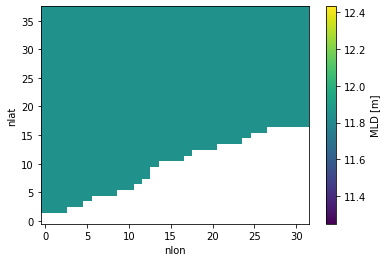

In [88]:
mld_check.plot()

In [94]:
rho.isel(nlat=0, nlon=0).values

array([1025.99604207, 1026.03989581, 1026.0838555 , 1026.12789591,
       1026.17199742, 1026.21614473, 1026.26032596, 1026.30453183,
       1026.34875513, 1026.39299023, 1026.43723278, 1026.48147936,
       1026.52572732, 1026.56997459, 1026.61421958, 1026.65846103,
       1026.70313325, 1026.7490484 , 1026.7968657 , 1026.8471374 ,
       1026.90041563, 1026.95728922, 1027.01840875, 1027.0845093 ,
       1027.15643424, 1027.23516169, 1027.32183551, 1027.41780193,
       1027.52465303, 1027.6442781 , 1027.7789241 , 1027.93126508,
       1028.10447933, 1028.30233044, 1028.52924394, 1028.79036449,
       1029.09156759, 1029.43938749, 1029.84080899, 1030.3028642 ,
       1030.83198929, 1031.43314954, 1032.10884246, 1032.8582204 ,
       1033.6766608 , 1034.55605327, 1035.48583154, 1036.45445984,
       1037.45090003, 1038.4656573 , 1039.49125206, 1040.52220585,
       1041.55474058, 1042.58637857, 1043.61556322, 1044.64135337,
       1045.6632004 , 1046.68079667, 1047.69397786, 1048.70266

In [43]:
ds['rho'] = pop_tools.eos(ds.SALT, ds.TEMP, depth=z_t * 1e-2) #- 1000.
ds.rho

<xarray.DataArray 'rho' (z_t: 60, nlat: 38, nlon: 32)>
array([[[1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207],
        [1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207],
        [1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207],
        ...,
        [1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207],
        [1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207],
        [1025.99604207, 1025.99604207, 1025.99604207, ...,
         1025.99604207, 1025.99604207, 1025.99604207]],

       [[1026.03989581, 1026.03989581, 1026.03989581, ...,
         1026.03989581, 1026.03989581, 1026.03989581],
        [1026.03989581, 1026.03989581, 1026.03989581, ...,
         1026.03989581, 1026.03989581, 1026.03989581],
        [1026.03989581, 1026.03989581, 1026.03989581, ...,
         1026.03989581, 1026.03989581, 1026.03989581],
...
        [1047.69397786, 1047.69397786, 1047.69397786, ...,
         1047.69397786, 1047.69397786, 1047.69397786],
        [1047.69397786, 1047.69397786, 1047.69397786, ...,
         1047.69397786, 1047.69397786, 1047.69397786],
        [1047.69397786, 1047.69397786, 1047.69397786, ...,
         1047.69397786, 1047.69397786, 1047.69397786]],

       [[1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253],
        [1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253],
        [1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253],
        ...,
        [1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253],
        [1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253],
        [1048.70266253, 1048.70266253, 1048.70266253, ...,
         1048.70266253, 1048.70266253, 1048.70266253]]])
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Attributes:
    units:      kg/m^3
    long_name:  Density

In [58]:
rho = ds.rho.chunk({'nlat': 1, 'nlon': 1})
rho

,Array,Chunk
Bytes,583.68 kB,480 B
Shape,"(60, 38, 32)","(60, 1, 1)"
Count,1217 Tasks,1216 Chunks
Type,float64,numpy.ndarray


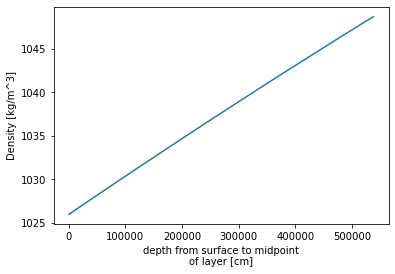

In [53]:
rho[:, 0, 0].plot()

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils

cluster, client = utils.get_ClusterClient()
cluster.scale(36) #adapt(minimum_jobs=0, maximum_jobs=24)
client

Client Scheduler: tcp://10.12.206.51:38778 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
import xarray as xr
ds = xr.merge((
    xr.open_dataset('/glade/p/cgd/oce/projects/cesm2-marbl/xpersist_cache/3d_fields/TEMP-presentday-monclim.nc'),
    xr.open_dataset('/glade/p/cgd/oce/projects/cesm2-marbl/xpersist_cache/3d_fields/SALT-presentday-monclim.nc'),    
))
ds = ds[['TEMP', 'SALT']].isel(member_id=0, month=0)
ds 

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
  * z_t        (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG      (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    TLAT       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    member_id  int64 1
    ULONG      (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    ULAT       (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    month      int64 1
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP       (z_t, nlat, nlon) float32 ...
    SALT       (z_t, nlat, nlon) float32 ...

In [ ]:
import calc
mld = calc.mld_dsigma(ds.SALT, ds.TEMP).compute()

In [ ]:
mld.plot()